# Apple Stock Price Prediction with ML


In this project, we are going to train a machine learning  model to fit inputs as features of Apple stock price and predict the close price.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
plt.style.use('fivethirtyeight')

In [4]:
# Load dataset

data = pd.read_csv("Apple_data.csv",index_col=0,parse_dates=True)

In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-11 00:00:00-05:00,135.899994,136.389999,133.770004,135.130005,133.726624,64280000
2021-02-12 00:00:00-05:00,134.350006,135.529999,133.690002,135.369995,133.964111,60145100
2021-02-16 00:00:00-05:00,135.490005,136.009995,132.789993,133.190002,131.806778,80576300
2021-02-17 00:00:00-05:00,131.250000,132.220001,129.470001,130.839996,129.481171,97918500
2021-02-18 00:00:00-05:00,129.199997,130.000000,127.410004,129.710007,128.362915,96856700


In [6]:
data.shape

(496, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 496 entries, 2021-02-11 00:00:00-05:00 to 2023-01-31 00:00:00-05:00
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       496 non-null    float64
 1   High       496 non-null    float64
 2   Low        496 non-null    float64
 3   Close      496 non-null    float64
 4   Adj Close  496 non-null    float64
 5   Volume     496 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.1+ KB


### Descriptive Statistics

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,496.000000,496.000000,496.000000,496.000000,496.000000,4.960000e+02
mean,148.060988,149.880040,146.339435,148.175948,147.427581,8.754067e+07
std,15.431203,15.631663,15.258400,15.470081,15.535389,2.592889e+07
min,119.029999,120.400002,116.209999,116.360001,115.151550,3.519590e+07
25%,136.004993,137.589996,134.125004,135.922501,135.455124,6.947065e+07
50%,147.205002,148.985001,145.764999,147.315002,146.766327,8.228475e+07
75%,159.689999,162.310001,157.050003,159.507496,158.763458,9.894005e+07
max,182.630005,182.940002,179.119995,182.009995,180.959747,1.954327e+08


## Let's visualize the dataset

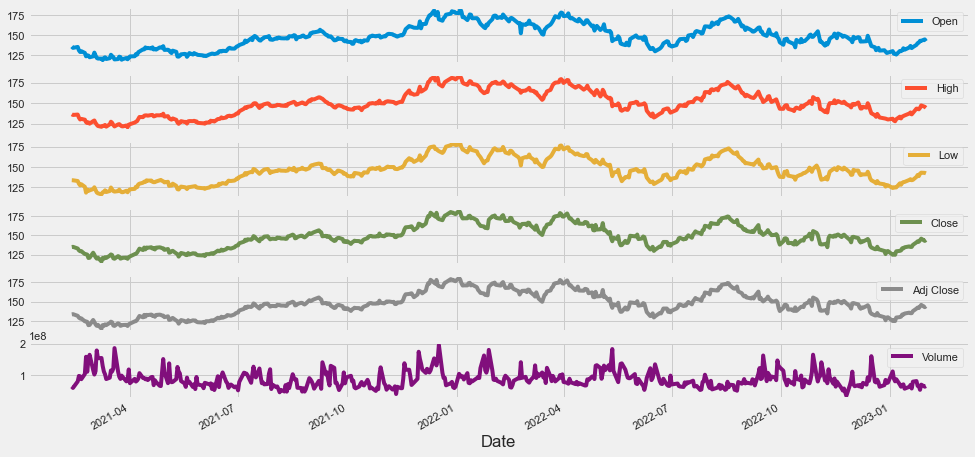

In [9]:
data.plot(subplots=True,grid=True,figsize=(15,8))
plt.show()

## Let's have a look at the correlation between the variables

<AxesSubplot:>

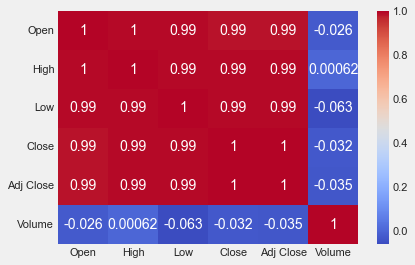

In [10]:
sns.heatmap(data.corr(),annot=True, cmap='coolwarm')

## Preparing the data for machine learning

In [11]:
# Set feature variables and target variable

X = data[['Open',"High",'Low']].values
Y = data['Close'].values

In [12]:
# Train Test Split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y , test_size=0.25, random_state=42)


## Train the model -- DecisionTreeRegressor()

In [13]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

model.fit(x_train,y_train)

DecisionTreeRegressor()

## Test and Evaluation of model

In [14]:
# predict the close price
y_pred = model.predict(x_test)

In [15]:
model_score = model.score(x_test,y_test)

In [16]:
print(model_score)

0.9818085604792169


## The accuracy of the model is 98%

In [17]:
predict_data = pd.DataFrame(data=({'Actual':y_test,'Predicted':y_pred}))

In [18]:
predict_data

,Actual,Predicted
0,146.630005,146.360001
1,125.279999,126.360001
2,175.080002,174.830002
3,149.479996,147.869995
4,164.509995,168.880005
...,...,...
119,157.279999,155.110001
120,146.100006,144.500000
121,150.429993,149.550003
122,143.110001,142.449997


C:\Users\Administrator\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'Predicted values')

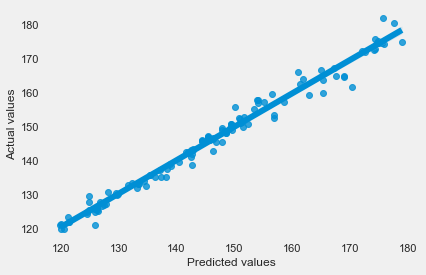

In [21]:
plt.grid()
sns.regplot(y_pred,y_test)
plt.ylabel('Actual values',size=12)
plt.xlabel('Predicted values',size=12)